In [149]:
from pandas import read_csv, concat, DataFrame
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import figure, savefig
from ds_charts import bar_chart, get_variable_types
from sklearn.impute import SimpleImputer
from numpy import nan

In [150]:
register_matplotlib_converters()
file = 'set1'
filename = 'new_data/set1_outliers.csv'
data = read_csv(filename, parse_dates=True, infer_datetime_format=True)

,CRASH_DATE,CRASH_TIME,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,EJECTION,...,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID,PERSON_INJURY
count,45669,45669,45213.000000,45669,39434,45669,45669,6571,6546,39429,...,45669,3.909800e+04,45669,6558,39448,45669,4.566900e+04,6571,4.566900e+04,45669
unique,320,24,NaN,14,16,3,4,4,39,4,...,8,NaN,45669,39,10,5,NaN,16,NaN,2
top,2021-05-27,16:00,NaN,Back,Lap Belt & Harness,M,Occupant,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,Not Ejected,...,Conscious,NaN,06869fa4-85f9-4499-9491-11132224bdce,Unspecified,Driver,Driver,NaN,Crossing With Signal,NaN,Injured
freq,222,3006,NaN,7505,18184,27573,32903,3953,5772,35883,...,42180,NaN,1,4675,26053,26542,NaN,2481,NaN,45416
mean,NaN,NaN,36.774401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.999663e+07,NaN,NaN,NaN,NaN,1.183588e+07,NaN,4.431737e+06,NaN
std,NaN,NaN,16.562875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.940981e+04,NaN,NaN,NaN,NaN,1.375828e+05,NaN,2.753403e+04,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.982197e+07,NaN,NaN,NaN,NaN,1.153725e+07,NaN,4.380715e+06,NaN
25%,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.996078e+07,NaN,NaN,NaN,NaN,1.177289e+07,NaN,4.408781e+06,NaN
50%,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000877e+07,NaN,NaN,NaN,NaN,1.185680e+07,NaN,4.432358e+06,NaN
75%,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.005868e+07,NaN,NaN,NaN,NaN,1.194421e+07,NaN,4.455395e+06,NaN


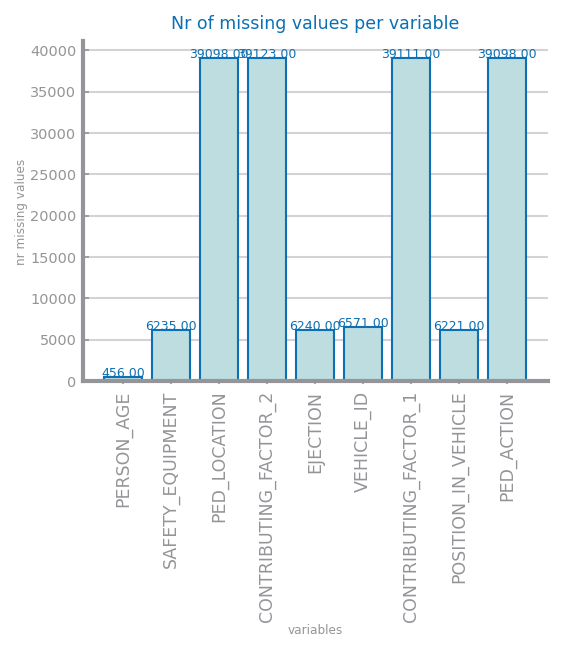

In [151]:
mv = {}
figure()
for var in data:
    nr = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

bar_chart(list(mv.keys()), list(mv.values()), title='Nr of missing values per variable', xlabel='variables', ylabel='nr missing values', rotation=True)
savefig(f'images/{file}_missing_values_number.png')
data.describe(include='all')

Dropped variables ['PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'CONTRIBUTING_FACTOR_1', 'PED_ACTION']


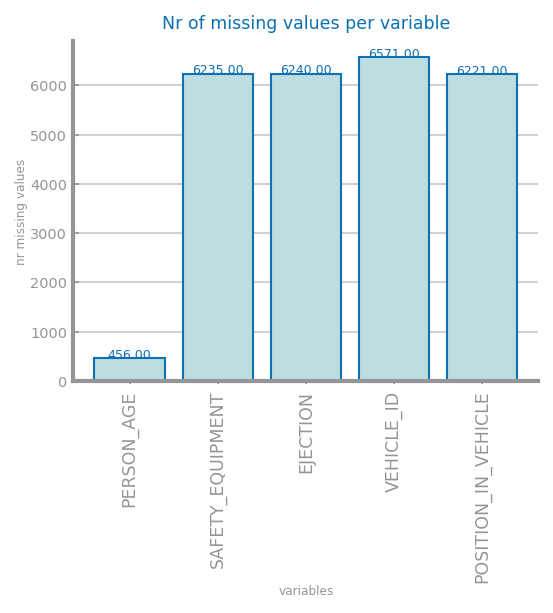

In [152]:
# defines the number of records to discard entire columns
threshold = data.shape[0] * 0.84

missings = [c for c in mv.keys() if mv[c]>threshold]
df_drop_columna = data.drop(columns=missings, inplace=False)
print('Dropped variables', missings)

mv = {}
figure()
for var in df_drop_columna.columns:
    nr = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

bar_chart(list(mv.keys()), list(mv.values()), title='Nr of missing values per variable', xlabel='variables', ylabel='nr missing values', rotation=True)
savefig(f'images/{file}_missing_values_number_drop_columns.png')

In [153]:

tmp_rest, tmp_nr, tmp_sb = None, None, None
variables_all = df_drop_columna.columns
variables_fill_NA = ['VEHICLE_ID', 'POSITION_IN_VEHICLE', 'EJECTION', 'SAFETY_EQUIPMENT']
variables_fill_mean = ['PERSON_AGE']
variables_rest = [var for var in variables_all if var not in variables_fill_NA + variables_fill_mean]

tmp_rest = df_drop_columna[variables_rest]

imp = SimpleImputer(strategy='constant', fill_value='NA', missing_values=nan, copy=True)
tmp_sb = DataFrame(imp.fit_transform(df_drop_columna[variables_fill_NA]), columns=variables_fill_NA)

mean_age = round(df_drop_columna['PERSON_AGE'].mean(),0)
imp = SimpleImputer(strategy='constant', fill_value=mean_age, missing_values=nan, copy=True)
tmp_nr = DataFrame(imp.fit_transform(df_drop_columna[variables_fill_mean]), columns=variables_fill_mean)

df_filled_NA = concat([tmp_rest, tmp_nr, tmp_sb], axis=1)
df_filled_NA.to_csv(f'new_data/{file}_mv.csv', index=False)
df_filled_NA.describe(include='all')
df_filled_NA

,CRASH_DATE,CRASH_TIME,BODILY_INJURY,PERSON_SEX,PERSON_TYPE,COMPLAINT,EMOTIONAL_STATUS,PERSON_ID,PED_ROLE,UNIQUE_ID,COLLISION_ID,PERSON_INJURY,PERSON_AGE,VEHICLE_ID,POSITION_IN_VEHICLE,EJECTION,SAFETY_EQUIPMENT
0,2021-01-01,00:00,Neck,M,Occupant,Complaint of Pain or Nausea,Conscious,06869fa4-85f9-4499-9491-11132224bdce,Driver,11537291,4380715,Injured,37.0,19821967.0,Driver,Not Ejected,Lap Belt & Harness
1,2021-01-01,00:00,Shoulder - Upper Arm,M,Occupant,Complaint of Pain or Nausea,Conscious,1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36,Driver,11539900,4381080,Injured,22.0,19823516.0,Driver,Not Ejected,Lap Belt & Harness
2,2021-01-01,00:00,Elbow-Lower-Arm-Hand,M,Pedestrian,Minor Bleeding,Conscious,7fe0f832-49c1-4c5c-879e-1e1e98d49b8c,Pedestrian,11540318,4381325,Injured,43.0,NA,NA,NA,NA
3,2021-01-01,00:00,Neck,F,Occupant,Complaint of Pain or Nausea,Conscious,500d8914-149f-4eed-918f-30664916f21d,Passenger,11537289,4380715,Injured,68.0,19821967.0,"Front passenger, if two or more persons, inclu...",Not Ejected,Lap Belt & Harness
4,2021-01-01,00:00,Neck,M,Occupant,Complaint of Pain or Nausea,Conscious,4932796e-b59d-417f-bafb-3f2c9bbb9e1f,Driver,11541732,4381682,Injured,22.0,19824561.0,Driver,Not Ejected,Lap Belt & Harness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45664,2021-11-16,21:00,Knee-Lower Leg Foot,F,Occupant,Unknown,Conscious,18465142-6546-4acb-8150-81a3a8eac7eb,Driver,12029258,4478379,Injured,28.0,20108649.0,Driver,Not Ejected,Lap Belt
45665,2021-11-16,22:00,Head,M,Other Motorized,Concussion,Conscious,15318ca9-4068-44fb-a214-8741e98b34ea,Passenger,12030319,4478824,Injured,25.0,20109268.0,"Middle rear seat, or passenger lying across a ...",Ejected,Unknown
45666,2021-11-16,22:00,Knee-Lower Leg Foot,F,Occupant,Internal,Conscious,b8a51aa1-53c7-4207-80ee-b9d24d7a8c78,Driver,12030015,4478367,Injured,30.0,20109092.0,Driver,Not Ejected,Lap Belt & Harness
45667,2021-11-16,22:00,Neck,M,Occupant,Complaint of Pain or Nausea,Conscious,226f89e5-5dfa-4f81-8e4d-d74b125b6ae0,Driver,12028436,4478081,Injured,62.0,20108198.0,Driver,Not Ejected,Lap Belt & Harness
